In [1]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from dateutil.relativedelta import relativedelta

/Users/uri/Desktop/BU/PortfolioConstructionFinalProject/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data = pd.read_csv('returns.csv', index_col = 0)
data.index = pd.to_datetime(data.index)
data = data[1:]
data.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1985-01-03,NaN,0.017936,NaN,NaN,-0.012308,NaN,NaN,NaN,0.005435,0.000000,...,NaN,0.008474,NaN,-0.005971,0.000000,NaN,NaN,NaN,NaN,NaN
1985-01-04,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,-0.008403,NaN,0.000000,-0.005618,NaN,NaN,NaN,NaN,NaN
1985-01-07,NaN,-0.004405,NaN,NaN,0.012461,NaN,NaN,NaN,0.010811,0.020135,...,NaN,0.000000,NaN,-0.006006,0.008474,NaN,NaN,NaN,NaN,NaN
1985-01-08,NaN,-0.008849,NaN,NaN,-0.006154,NaN,NaN,NaN,-0.021390,0.000000,...,NaN,0.000000,NaN,-0.003021,0.000000,NaN,NaN,NaN,NaN,NaN
1985-01-09,NaN,0.026784,NaN,NaN,-0.001872,NaN,NaN,NaN,0.005464,0.000000,...,NaN,-0.004237,NaN,0.006060,0.002801,NaN,NaN,NaN,NaN,NaN


In [3]:
monthly_dates = data.resample("MS").last().index
monthly_dates

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=468, freq='MS')

In [24]:
from pandas.tseries.offsets import MonthEnd
winnerLosers = pd.DataFrame()

for month in monthly_dates[37:]:
    end = month
    beg = month - relativedelta(months = 37)
    returns36month = data[(data.index >= beg) & (data.index < end)]
    returns36month = returns36month + 1
    cum36 = returns36month.prod() - 1
    winnerLosers[month] = cum36

winnerLosers = winnerLosers.T

/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/875657130.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  winnerLosers[month] = cum36
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/875657130.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  winnerLosers[month] = cum36
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/875657130.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

In [5]:
winnerLosers

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,0.000000,1.992479,0.000000,0.000000,1.557135,0.000000,0.000000,2.925917,-0.355072,0.872763,...,0.000000,0.458917,0.000000,0.790789,1.237882,0.000000,0.000000,0.000000,0.000000,0.000000
1988-03-01,0.000000,1.986244,0.000000,0.000000,1.327742,0.000000,0.000000,3.296287,-0.367442,0.736933,...,0.000000,0.547452,0.000000,0.693378,1.131572,0.000000,0.000000,0.000000,0.000000,0.000000
1988-04-01,0.000000,2.254907,0.000000,0.000000,1.070931,0.000000,0.000000,3.592583,-0.369369,0.799112,...,0.000000,0.413072,0.000000,0.696978,1.085134,0.000000,0.000000,0.000000,0.000000,0.000000
1988-05-01,0.000000,2.732113,0.000000,0.000000,0.831673,0.000000,0.000000,4.185174,-0.295598,0.880282,...,0.000000,0.506463,0.000000,0.627169,1.105941,0.000000,0.000000,0.000000,0.000000,0.000000
1988-06-01,0.000000,2.940957,0.000000,0.000000,0.921895,0.000000,0.000000,4.222211,0.072072,0.872602,...,0.000000,0.472605,0.000000,0.625311,1.086560,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.404287,1.193984,0.753127,0.051690,0.284532,1.711693,0.541165,0.254669,0.717720,1.282472,...,0.118478,0.732905,0.466339,0.092011,1.809222,0.797338,0.672404,0.218315,0.203204,0.403253
2023-09-01,0.280841,0.803225,0.760279,-0.090941,0.074443,1.499512,0.501221,0.258868,0.671058,0.995244,...,0.026240,0.353475,0.406586,-0.099683,2.120806,0.473896,0.507262,-0.070244,-0.020445,0.282328
2023-10-01,0.134801,0.350781,0.769400,-0.051828,-0.070299,1.527267,0.334059,-0.006798,0.580946,0.801071,...,0.063991,0.162589,0.061920,-0.095758,2.409713,0.175665,0.375916,-0.159708,-0.174502,0.109475
2023-11-01,0.045746,0.501224,0.850711,-0.182572,-0.081987,1.963419,0.375821,0.084885,0.422288,0.645530,...,0.178303,0.156168,0.228410,-0.063006,2.571161,0.151498,0.397315,-0.192393,-0.170443,-0.028392


In [6]:
cols_with_nan = winnerLosers.columns[winnerLosers.isna().any()] 
cols_with_nan

Index([], dtype='object')

In [43]:
winnerLosers_rank = winnerLosers.rank(axis=1, method='first', ascending=True).astype(int)
winnerLosers_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,45,486,46,47,474,48,49,496,16,419,...,309,374,310,410,461,311,312,313,314,315
1988-03-01,51,488,52,53,472,54,55,499,16,411,...,315,388,316,404,457,317,318,319,320,321
1988-04-01,49,494,50,51,457,52,53,500,19,430,...,313,367,314,415,460,315,316,317,318,319
1988-05-01,48,496,49,50,433,51,52,500,20,441,...,312,385,313,404,458,314,315,316,317,318
1988-06-01,49,497,50,51,442,52,53,501,328,436,...,313,376,314,403,462,315,316,317,318,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,202,419,327,71,149,457,255,138,317,429,...,80,320,228,76,462,339,299,121,112,201
2023-09-01,189,369,356,51,112,453,285,176,331,412,...,90,228,253,50,479,279,287,60,74,190
2023-10-01,172,281,396,95,87,465,271,109,348,402,...,139,194,137,80,486,200,287,58,53,156
2023-11-01,151,332,415,62,91,475,286,167,308,368,...,211,199,238,101,486,197,295,60,66,116


In [9]:
cols_with_nan = winnerLosers.columns[winnerLosers.iloc[0].isna()] 
cols_with_nan

Index([], dtype='object')

In [10]:
momentum = pd.DataFrame()

for month in monthly_dates[13:]: # 12M excluding last month MOM12-2
    end = (month - pd.DateOffset(months = 2)) + MonthEnd(0)
    beg = (month - pd.DateOffset(months = 13)).replace(day = 1)
    
    # print(month, ": ", beg, "-", end)    
    
    retursn2Minus12 = data[(data.index >= beg) & (data.index <= end)]
    retursn2Minus12 = retursn2Minus12 + 1
    mom = retursn2Minus12.prod() - 1

    momentum[month] = mom

momentum = momentum.T

/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/4177590632.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum[month] = mom
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/4177590632.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  momentum[month] = mom
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/4177590632.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [11]:
momentum

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1986-02-01,0.000000,-0.210765,0.000000,0.000000,0.728706,0.000000,0.000000,0.000000,0.146739,0.475459,...,0.000000,0.090508,0.000000,0.312091,0.324814,0.000000,0.000000,0.000000,0.000000,0.000000
1986-03-01,0.000000,-0.202581,0.000000,0.000000,0.491159,0.000000,0.000000,0.000000,-0.041861,0.382151,...,0.000000,0.093020,0.000000,0.294348,0.153017,0.000000,0.000000,0.000000,0.000000,0.000000
1986-04-01,0.000000,0.010100,0.000000,0.000000,0.511829,0.000000,0.000000,0.000000,0.063063,0.507388,...,0.000000,0.246980,0.000000,0.458114,0.176196,0.000000,0.000000,0.000000,0.000000,0.000000
1986-05-01,0.000000,0.276839,0.000000,0.000000,0.667770,0.000000,0.000000,0.000000,0.018867,0.487873,...,0.000000,0.426821,0.000000,0.454780,0.186303,0.000000,0.000000,0.000000,0.000000,0.000000
1986-06-01,0.000000,0.423535,0.000000,0.000000,0.730415,0.000000,0.000000,0.000000,0.711712,0.373745,...,0.000000,0.370441,0.000000,0.429580,0.175677,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.021129,0.427211,-0.086213,0.438707,0.022289,0.645416,0.129312,0.335819,0.358616,-0.006321,...,0.210662,0.063796,0.857669,-0.094975,0.295637,0.458466,0.243652,0.396583,0.006396,0.010362
2023-09-01,-0.085792,0.216067,0.084582,0.371328,0.042492,0.749775,0.049670,0.331732,0.182188,0.047508,...,0.036272,-0.014009,0.720662,-0.117021,0.144620,0.240405,0.144690,0.261142,-0.139031,0.039467
2023-10-01,-0.049586,0.202039,0.137305,0.162924,0.021658,0.681102,0.140582,0.497804,0.216377,-0.078628,...,0.014402,0.013836,0.681450,-0.207434,0.201607,0.150644,0.184782,0.129048,-0.088284,0.227855
2023-11-01,-0.073814,0.246206,0.155705,0.306264,0.020124,0.750329,0.212913,0.852834,0.280165,-0.042670,...,0.055253,0.129259,0.473344,-0.076778,0.391165,0.054929,0.196842,0.081585,-0.097248,0.183626


In [13]:
momentum_rank = momentum.rank(axis=1, method='first', ascending=False).astype(int)
momentum_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1986-02-01,193,496,194,195,24,196,197,198,167,68,...,474,176,475,121,115,476,477,478,479,480
1986-03-01,173,491,174,175,49,176,177,178,470,81,...,453,149,454,103,136,455,456,457,458,459
1986-04-01,185,183,186,187,69,188,189,190,171,70,...,465,132,466,85,144,467,468,469,470,471
1986-05-01,192,148,193,194,53,195,196,197,189,92,...,470,109,471,101,158,472,473,474,475,476
1986-06-01,198,104,199,200,36,201,202,203,40,120,...,475,123,476,100,174,477,478,479,480,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,335,94,427,90,333,38,258,126,116,367,...,203,311,19,433,149,82,173,107,351,346
2023-09-01,411,141,256,71,291,16,279,82,166,283,...,299,350,19,431,195,126,194,114,446,295
2023-10-01,368,172,224,203,308,18,217,44,161,393,...,315,316,17,469,173,210,186,232,403,156
2023-11-01,413,181,253,147,357,19,209,16,166,400,...,325,271,65,415,96,326,221,303,428,233


In [14]:
integrate_rank = (momentum_rank + winnerLosers_rank) / 2
integrate_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1986-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,268.5,256.5,377.0,80.5,241.0,247.5,256.5,132.0,216.5,398.0,...,141.5,315.5,123.5,254.5,305.5,210.5,236.0,114.0,231.5,273.5
2023-09-01,300.0,255.0,306.0,61.0,201.5,234.5,282.0,129.0,248.5,347.5,...,194.5,289.0,136.0,240.5,337.0,202.5,240.5,87.0,260.0,242.5
2023-10-01,270.0,226.5,310.0,149.0,197.5,241.5,244.0,76.5,254.5,397.5,...,227.0,255.0,77.0,274.5,329.5,205.0,236.5,145.0,228.0,156.0
2023-11-01,282.0,256.5,334.0,104.5,224.0,247.0,247.5,91.5,237.0,384.0,...,268.0,235.0,151.5,258.0,291.0,261.5,258.0,181.5,247.0,174.5


In [29]:
def top10_long_short_equal_weight(row):
    ten_percent = math.floor(len(row) * 0.10)
    top = row.nlargest(ten_percent).index
    bot = row.nsmallest(ten_percent).index
    weight = pd.Series(0, index = row.index)
    weight[top] = weight[top] + 1 / ten_percent
    weight[bot] = weight[bot] - 1 / ten_percent
    return weight

In [30]:
# adjust integrate rank. Winners & losers needs more data to generate signal
# thus cannot compute integrated signal until we have a signal for winners & losers
integrate_rank = integrate_rank.loc["1988-02-01":]
integrate_rank

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,80.5,245.5,81.5,82.5,276.5,83.5,84.5,249.5,240.5,233.0,...,345.0,228.5,346.0,412.5,262.5,347.0,348.0,349.0,350.0,351.0
1988-03-01,67.5,247.0,68.5,69.5,436.0,70.5,71.5,251.5,251.0,220.0,...,331.5,411.5,332.5,402.5,256.5,333.5,334.5,335.5,336.5,337.5
1988-04-01,66.0,256.5,67.0,68.0,438.0,69.0,70.0,258.0,248.0,229.0,...,330.0,397.5,331.0,385.5,246.0,332.0,333.0,334.0,335.0,336.0
1988-05-01,61.0,256.0,62.0,63.0,436.5,64.0,65.0,448.0,247.0,240.5,...,325.0,425.0,326.0,380.0,260.5,327.0,328.0,329.0,330.0,331.0
1988-06-01,70.0,285.0,71.0,72.0,448.0,73.0,74.0,486.5,405.0,227.5,...,334.0,424.5,335.0,382.5,257.5,336.0,337.0,338.0,339.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,268.5,256.5,377.0,80.5,241.0,247.5,256.5,132.0,216.5,398.0,...,141.5,315.5,123.5,254.5,305.5,210.5,236.0,114.0,231.5,273.5
2023-09-01,300.0,255.0,306.0,61.0,201.5,234.5,282.0,129.0,248.5,347.5,...,194.5,289.0,136.0,240.5,337.0,202.5,240.5,87.0,260.0,242.5
2023-10-01,270.0,226.5,310.0,149.0,197.5,241.5,244.0,76.5,254.5,397.5,...,227.0,255.0,77.0,274.5,329.5,205.0,236.5,145.0,228.0,156.0
2023-11-01,282.0,256.5,334.0,104.5,224.0,247.0,247.5,91.5,237.0,384.0,...,268.0,235.0,151.5,258.0,291.0,261.5,258.0,181.5,247.0,174.5


In [32]:
integrated_weights = integrate_rank.apply(top10_long_short_equal_weight, axis = 1)
integrated_weights

/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/638626753.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weight[top] = weight[top] + 1 / ten_percent
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/638626753.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.0

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,-0.02,0.0,-0.02,-0.02,0.00,-0.02,-0.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.0,0.0,0.00,0.0,0.0
1988-03-01,-0.02,0.0,-0.02,-0.02,0.02,-0.02,-0.02,0.00,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
1988-04-01,-0.02,0.0,-0.02,-0.02,0.02,-0.02,-0.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
1988-05-01,-0.02,0.0,-0.02,-0.02,0.02,-0.02,-0.02,0.02,0.00,0.00,...,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
1988-06-01,-0.02,0.0,-0.02,-0.02,0.02,-0.02,-0.02,0.02,0.02,0.00,...,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.00,0.0,0.02,-0.02,0.00,0.00,0.00,-0.02,0.00,0.02,...,-0.02,0.00,-0.02,0.00,0.00,0.0,0.0,-0.02,0.0,0.0
2023-09-01,0.00,0.0,0.00,-0.02,0.00,0.00,0.00,-0.02,0.00,0.02,...,0.00,0.00,-0.02,0.00,0.00,0.0,0.0,-0.02,0.0,0.0
2023-10-01,0.00,0.0,0.00,-0.02,0.00,0.00,0.00,-0.02,0.00,0.02,...,0.00,0.00,-0.02,0.00,0.00,0.0,0.0,-0.02,0.0,0.0
2023-11-01,0.00,0.0,0.00,-0.02,0.00,0.00,0.00,-0.02,0.00,0.02,...,0.00,0.00,-0.02,0.00,0.00,0.0,0.0,0.00,0.0,0.0


In [33]:
def top5_long_short_equal_weight_winnersLosers(row):
    ten_percent = math.floor(len(row) * 0.10)
    top5 = int(ten_percent / 2) # cast as integer
    top = row.nlargest(top5).index
    bot = row.nsmallest(top5).index
    weight = pd.Series(0, index = row.index)
    weight[top] = weight[top] - 1 / ten_percent # keep 10% allocation
    weight[bot] = weight[bot] + 1 / ten_percent
    return weight

def top5_long_short_equal_weight_momentum(row):
    ten_percent = math.floor(len(row) * 0.10)
    top5 = int(ten_percent / 2) # cast as integer
    top = row.nlargest(top5).index
    bot = row.nsmallest(top5).index
    weight = pd.Series(0, index = row.index)
    weight[top] = weight[top] + 1 / ten_percent # keep 10% allocation
    weight[bot] = weight[bot] - 1 / ten_percent
    return weight

In [34]:
momentum_weights = momentum_rank.apply(top5_long_short_equal_weight_momentum, axis = 1)
winnerLosers_weights = winnerLosers_rank.apply(top5_long_short_equal_weight_winnersLosers, axis = 1)
mixed_weights = momentum_weights + winnerLosers_weights
mixed_weights = mixed_weights.loc["1988-02-01":]
mixed_weights


/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/2336862087.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weight[top] = weight[top] + 1 / ten_percent # keep 10% allocation
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/2336862087.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weight[top] = weight[top] + 1 / ten_percent # keep 10% allocation
/var/fol

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
1988-02-01,0.0,-0.04,0.0,0.0,0.0,0.00,0.0,-0.04,0.02,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1988-03-01,0.0,-0.04,0.0,0.0,0.0,0.00,0.0,-0.04,0.04,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1988-04-01,0.0,-0.04,0.0,0.0,0.0,0.00,0.0,-0.04,0.02,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1988-05-01,0.0,-0.04,0.0,0.0,0.0,0.00,0.0,-0.02,0.02,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1988-06-01,0.0,-0.02,0.0,0.0,0.0,0.00,0.0,-0.02,0.02,-0.02,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,-0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2023-09-01,0.0,0.00,0.0,0.0,0.0,-0.02,0.0,0.00,0.00,0.00,...,0.0,0.0,-0.02,0.0,-0.02,0.0,0.0,0.0,0.0,0.0
2023-10-01,0.0,0.00,0.0,0.0,0.0,-0.02,0.0,0.00,0.00,0.00,...,0.0,0.0,-0.02,0.0,-0.02,0.0,0.0,0.0,0.0,0.0
2023-11-01,0.0,0.00,0.0,0.0,0.0,-0.02,0.0,-0.02,0.00,0.00,...,0.0,0.0,0.00,0.0,-0.02,0.0,0.0,0.0,0.0,0.0


In [35]:
integrated_portfolio = pd.DataFrame()

for month in integrated_weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = integrated_weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    integrated_portfolio = pd.concat([integrated_portfolio, ret_portfolio])
    
integrated_portfolio.columns = ["Portfolio Return"]
integrated_portfolio

/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/907358628.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  integrated_portfolio = pd.concat([integrated_portfolio, ret_portfolio])


,Portfolio Return
1988-02-01,0.002694
1988-02-02,0.001180
1988-02-03,-0.006941
1988-02-04,0.001064
1988-02-05,-0.000497
...,...
2023-12-22,0.000151
2023-12-26,0.003787
2023-12-27,-0.000936
2023-12-28,-0.006560


In [36]:
mixed_portfolio = pd.DataFrame()

for month in mixed_weights.index:
    beg = month
    end = beg + MonthEnd(0)
    ret_month = data.loc[beg:end] # filter the monthly returns for this period
    cum_month = (1 + ret_month).cumprod() # compute cum returns (no daily rebalancing)

    # adjust for equal weights in first trading day of month
    cum_month= cum_month.shift(1)
    cum_month.iloc[0] = 1

    ini_weight = mixed_weights.loc[month] # get initial weights for the period
    month_weights = cum_month.multiply(ini_weight, axis=1)
    
    ret_portfolio = (month_weights * ret_month).sum(axis = 1)
    mixed_portfolio = pd.concat([mixed_portfolio, ret_portfolio])
    
mixed_portfolio.columns = ["Portfolio Return"]
mixed_portfolio

/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/301786247.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  mixed_portfolio = pd.concat([mixed_portfolio, ret_portfolio])


,Portfolio Return
1988-02-01,0.004007
1988-02-02,0.006218
1988-02-03,0.020568
1988-02-04,-0.003179
1988-02-05,0.000015
...,...
2023-12-22,0.004699
2023-12-26,0.003291
2023-12-27,0.001812
2023-12-28,0.010770


<Axes: >

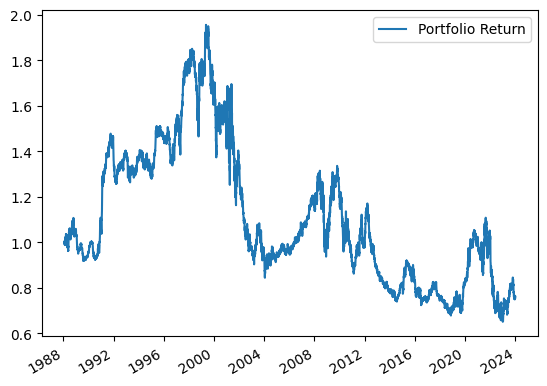

In [37]:
cum_returns = (1 + integrated_portfolio).cumprod()
cum_returns.plot()

<Axes: >

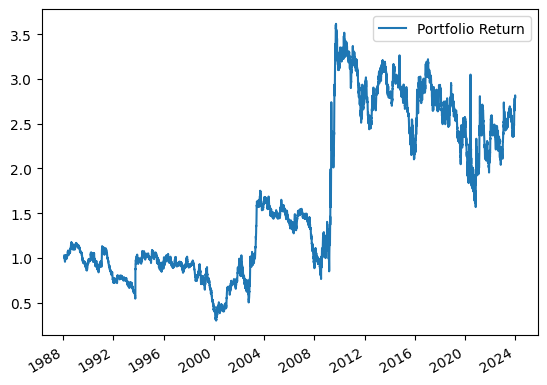

In [38]:
cum_returns = (1 + mixed_portfolio).cumprod()
cum_returns.plot()

In [39]:
mupor = integrated_portfolio.mean() * 252
sdpor = integrated_portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: 0.0019118775162130764
Std: 0.13937212231449322
Sharpe: 0.013717790074968683


/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/68814152.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mu: {mupor[0]}")
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/68814152.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Std: {sdpor[0]}")
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/68814152.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f

In [40]:
mupor = mixed_portfolio.mean() * 252
sdpor = mixed_portfolio.std() * np.sqrt(252)
srpor = mupor / sdpor

print(f"Mu: {mupor[0]}")
print(f"Std: {sdpor[0]}")
print(f"Sharpe: {srpor[0]}")

Mu: 0.062056718494375794
Std: 0.26312389665306396
Sharpe: 0.2358459998644641


/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/3090021226.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mu: {mupor[0]}")
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/3090021226.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Std: {sdpor[0]}")
/var/folders/vy/wx4s8rtd79n9d9lh1qlpfmh00000gn/T/ipykernel_29926/3090021226.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p